<a href="https://colab.research.google.com/github/yejin0455/sesac-DL/blob/main/D15_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%run my_init.py

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
tf.__version__: 2.8.0
keras.__version__: 2.8.0


In [ ]:
%matplotlib inline

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [ ]:
X_train_scaled = X_train.reshape(60000, 28, 28, 1) / 255.0

In [ ]:
X_train_scaled = X_train.reshape(-1,28,28,1)/255.0 #데이터 2D->3D 가 60000개 인 것(그림 잘 이해하기!!!)

In [ ]:
X_train_scaled, X_val_scaled, y_train, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

In [ ]:
X_train_scaled.shape

(48000, 28, 28, 1)

In [ ]:
model = keras.Sequential()

In [ ]:
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

In [ ]:
model.add(keras.layers.MaxPooling2D(2))

In [ ]:
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))

In [ ]:
model.add(keras.layers.MaxPooling2D((2)))

In [ ]:
model.add(keras.layers.Flatten()) #최종으로 나온 FeatureMap 을 뉴런 3136개로 flatten
model.add(keras.layers.Dense(100, activation='relu')) #100개 뉴런 은닉층
model.add(keras.layers.Dropout(0.4)) # 드롭아웃 -> 뉴런 40% 비활성화
model.add(keras.layers.Dense(10, activation='softmax')) # 10개 뉴런 출력층

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

In [ ]:
len(model.layers[0].weights)

2

In [ ]:
model.layers[0].weights[0].shape  #필터 32개의 커널 크기

TensorShape([3, 3, 1, 32])

In [ ]:
model.layers[0].weights[1].shape  #필터 32개의 바이어스 개수

TensorShape([32])

In [ ]:
model.layers[1].weights  #MaxPoolind2D에는 학습된 정보가 없습니다

[]

In [ ]:
model.layers[2].weights[0].shape  #필터 64개의 커널 크기

TensorShape([3, 3, 32, 64])

In [ ]:
model.layers[2].weights[1].shape  #필터 64개의 커널 바이어스 개수

TensorShape([64])

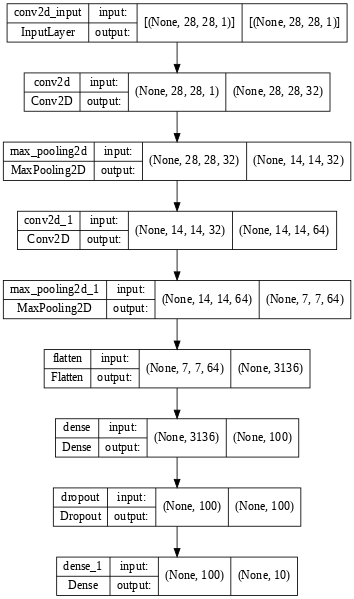

In [ ]:
keras.utils.plot_model(model, show_shapes=True, dpi=60)

In [ ]:
X_val_scaled.shape

(12000, 28, 28, 1)

In [ ]:
X_val_scaled[0].shape

(28, 28, 1)

In [ ]:
X_val_scaled[0:1].shape

(1, 28, 28, 1)

In [ ]:
X_val_scaled[0].reshape(-1, 28, 28, 1).shape

(1, 28, 28, 1)

In [ ]:
np.unique(y_train)  #sparse_categorical_crossentropy

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
keras.utils.to_categorical(y_train)[0:1]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [ ]:
chkpoint = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=20, validation_data=(X_val_scaled, y_val), callbacks=[chkpoint, early_stopping])

Epoch 1/20
1500/1500 [==============================] - 21s 8ms/step - loss: 0.5398 - accuracy: 0.8043 - val_loss: 0.3339 - val_accuracy: 0.8780
Epoch 2/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3565 - accuracy: 0.8719 - val_loss: 0.2986 - val_accuracy: 0.8879
Epoch 3/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3067 - accuracy: 0.8900 - val_loss: 0.2554 - val_accuracy: 0.9052
Epoch 4/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2752 - accuracy: 0.9006 - val_loss: 0.2424 - val_accuracy: 0.9112
Epoch 5/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2457 - accuracy: 0.9095 - val_loss: 0.2354 - val_accuracy: 0.9124
Epoch 6/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2279 - accuracy: 0.9161 - val_loss: 0.2320 - val_accuracy: 0.9152
Epoch 7/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2120 - accuracy: 0.9222 - val_loss: 0.2215 - val_ac

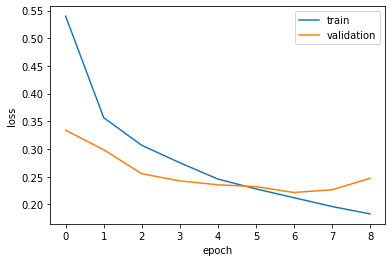

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
model.evaluate(X_val_scaled, y_val)

375/375 [==============================] - 1s 4ms/step - loss: 0.2215 - accuracy: 0.9218


[0.2214849293231964, 0.921833336353302]

In [ ]:
X_val_scaled[0:1].shape

(1, 28, 28, 1)

In [ ]:
preds = model.predict(X_val_scaled[0:1])
preds

array([[7.9732249e-13, 2.7589760e-20, 2.9643490e-17, 5.4609190e-14,
        9.2086461e-14, 3.9168819e-14, 4.3115912e-16, 3.8116109e-13,
        1.0000000e+00, 6.2664733e-13]], dtype=float32)

In [ ]:
?keras.datasets.fashion_mnist.load_data

In [ ]:
classes = ['t-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
classes[np.argmax(preds)]

'Bag'

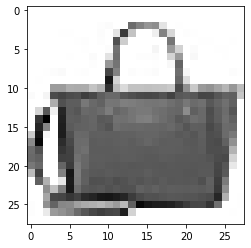

In [ ]:
plt.imshow(X_val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [ ]:
X_test_scaled = X_test.reshape(-1, 28, 28, 1) / 255.0

In [ ]:
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.2433 - accuracy: 0.9118


[0.24334058165550232, 0.9118000268936157]